# Installation de librairies
> Il est conseillé de paramétrer le notebook pour utiliser le GPU (menu modifer / Paramètres du notebook).

In [ ]:
!pip install -U spacy
!python -m spacy download fr_core_news_sm

     |████████████████████████████████| 6.0 MB 4.3 MB/s 
     |████████████████████████████████| 10.1 MB 54.0 MB/s 
     |████████████████████████████████| 451 kB 14.6 MB/s 
     |████████████████████████████████| 628 kB 63.5 MB/s 
     |████████████████████████████████| 181 kB 52.9 MB/s 
     |████████████████████████████████| 42 kB 1.8 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 17.4 M

In [ ]:
!pip install spacy-langdetect

     |████████████████████████████████| 998 kB 5.0 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993431 sha256=a3f6b69fce4fcf5a4c510fcbc320dc59e918ec501af2af31fa1c63d64ac70406
  Stored in directory: /root/.cache/pip/wheels/89/79/3b/9885ae7f4308f73c514f96d8574d40d7d8173a27731b674013
Successfully built langdetect


In [ ]:
!python -m spacy download fr_dep_news_trf

     |████████████████████████████████| 400.7 MB 23 kB/s 
     |████████████████████████████████| 51 kB 193 kB/s 
     |████████████████████████████████| 1.2 MB 10.1 MB/s 
     |████████████████████████████████| 3.4 MB 77.6 MB/s 
     |████████████████████████████████| 1.1 MB 65.7 MB/s 
     |████████████████████████████████| 895 kB 63.6 MB/s 
     |████████████████████████████████| 596 kB 76.1 MB/s 
     |████████████████████████████████| 3.3 MB 44.7 MB/s 
     |████████████████████████████████| 67 kB 5.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
✔ Download and installation successful
You can now load the package via spacy.load('fr_dep_news_trf')


----
## Ne pas oublier de relancer l'environnement
----

# Téléchargement des données du "Data-Paper"
> récupération depuis le dépôt Git des données sauvegardées. Le dossier DistorsionCom, sera accessible après téléchargement par le menu fichier à gauche. Le dossier contient également un ensemble de fonctions utilitaires dans le document "outils.py"

In [ ]:
from google.colab import files

# Si le dossier est déjà monté dans l'environnement d'exécution, on passe
try:
  !git clone https://github.com/Patent2net/LexiComWeb.git
  os.chdir('LexiComWeb')
except:
  print("Dossier déjà monté, vous pouvez continuer l'exécution")

Cloning into 'LexiComWeb'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 38 (delta 6), reused 37 (delta 5), pack-reused 0
Unpacking objects: 100% (38/38), done.
Dossier déjà monté, vous pouvez continuer l'exécution


In [ ]:
import os
os.chdir("/content/LexiComWeb/RESSOURCES")
from outils import isPartner

In [ ]:
stockageEntree = "/content/LexiComWeb/"
stockageSortie = "/content/LexiComWeb/"


---
# Personnalisation (Option)

> Ces cellules permettent de réaliser les traitements à partir de son propre espace de stockage. A n'exécuter que dans ce cas en adaptant les dossiers d'entrée et sortie. NE PAS EXECUTER SAUF A VOULOIR PERSONNALISER LES TRAITEMENTS.

Si vous avez exécuté le scraper et reconstitué l'ensemble des dossiers nécessaires sur votre drive, ces cellules vous permettent de configurer ce notebook pour travailler sur vos données et non celles issues du git (accessibles sur un dossier virtuel via le menu *Fichiers* à gauche).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Récupérer les entrées sur son drive
stockageEntree = "/content/drive/MyDrive/OUT"

# Récupérer les sorties sur son drive (créer un dossier "OUT")
stockageSortie = "/content/drive/MyDrive/OUT"

---

# Chargement des librairies et fonctions utilitaires

In [ ]:
import os, re, spacy
from os import path
from collections import Counter
from spacy.language import Language
from spacy_langdetect import LanguageDetector
import pandas as pd
from urllib import parse
import json

In [ ]:
def get_lang_detector(nlp, name):
    return LanguageDetector()

In [ ]:
# A ne pas lancer plusieurs fois !!
Language.factory("language_detector", func=get_lang_detector)

<function __main__.get_lang_detector>

---

# Prétraitements 

## Détection de langue
> Les procédures de lemmatisation et autres fonctions TAL sont fonction de la langue. Seul le modèle FR est chargé. Les autres langues seront exclues.

In [ ]:
  # deux modèles de données spacy sont utilisés du fait de leur efficacité relative à la détection des entités
    # 'fr_core_news_sm' fonctionne mieux pour la détection des entités
  tal = spacy.load('fr_core_news_sm')


In [ ]:
tal.add_pipe('language_detector', last=True) # Permet de détecter la langue

In [ ]:
aGarder, aVirer = dict([]), dict([])

In [ ]:
for ndf in os.listdir(stockageEntree + "/ContenusSites/"):
  fichierEntree = stockageEntree + "/ContenusSites/" + ndf
  if not ndf.startswith('.') and "backlinks" not in ndf and 'stats' not in ndf and "BadUrls" not in ndf:
    with open (fichierEntree, 'rb') as  fictemp:
      soupe = json.load(fictemp)
    ndf = ndf.replace('.json', '')
    if ndf not in aVirer.keys():
      aVirer[ndf] = []
    if ndf not in aGarder.keys():
      aGarder[ndf] = []
    for url in soupe.keys():
      tousLesContenus = soupe [url] 
      if len(str(tousLesContenus))< 1000000:
        doc = tal(str(tousLesContenus))
        if not doc._.language["language"] == "fr": # exclusion si fr non détecté
          print("pas fr (ou vide) : ", url, soupe [url] )
          aVirer[ndf].append(url)
        else:
          aGarder[ndf].append(url)
      else:
        aVirer[ndf].append(url) # erreur très probable du collecteur au moment de la collecte
        print("vraiment trop grand : ", url )
# seront affichés dans la fenêtre de sortie les url collectés dont le contenu est détecté comme non FR. 
# les urls sont placés dans la variable aVirer [categorieEnCours]

pas fr (ou vide) :  http://carqueiranne.fr 403 Forbidden    403 Forbidden  nginx  
pas fr (ou vide) :  http://heliotel.net 403 Forbidden    403 Forbidden  nginx  
pas fr (ou vide) :  http://pradet-vacances.com Not Acceptable! Not Acceptable! An appropriate representation of the requested resource could not be found on this server. This error was generated by Mod_Security.
pas fr (ou vide) :  http://campingdupindegalle.com 403 Forbidden    403 Forbidden  nginx  
pas fr (ou vide) :  http://labastide-decharlotte.fr 403 Forbidden    403 Forbidden  nginx  
pas fr (ou vide) :  http://villa-carmignac.com 404 Not Found  Not Found  The requested URL was not found on this server. 
pas fr (ou vide) :  http://mercure.com Book a 3 or 4-star hotel at the best price - Mercure America       Menu  Mercure Home  The Mercure Experience  Discover Local  Discover our Local Stories  Special Offers  Our hotels around the world Back  Our hotels around the world Flagship Hotels Travel ideas Mercure world tour 

In [ ]:
fichierDeSortie = stockageSortie + '/Tempo/' +'vires.json'
with open (fichierDeSortie, 'w', encoding='utf8') as  fictemp: #on met tous les contenus en json
  json.dump(aVirer, fictemp)

fichierDeSortie = stockageSortie + '/Tempo/' +'gardes.json'
with open (fichierDeSortie, 'w', encoding='utf8') as  fictemp: #on met tous les contenus en json
  json.dump(aGarder, fictemp)

In [ ]:
# pour éviter les traitements précédents
fichierDeSortie = stockageSortie + '/Tempo/' +'vires.json'
with open (fichierDeSortie, 'rb') as  fictemp: #on met tous les contenus en json
  aVirer = json.load(fictemp)

fichierDeSortie = stockageSortie + '/Tempo/' +'gardes.json'
with open (fichierDeSortie, 'rb') as  fictemp: #on met tous les contenus en json
  aGarder =json.load(fictemp)

# Supression des extrêmes


In [ ]:
aGarderTemp, aVirerTemp = aGarder, aVirer

In [ ]:
# Exclusion du PNPC de la représentation des parcs
aVirer["parcs"] = "http://www.portcrosparcnational.fr/"

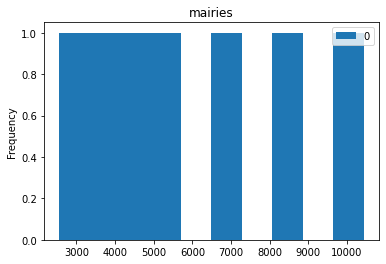

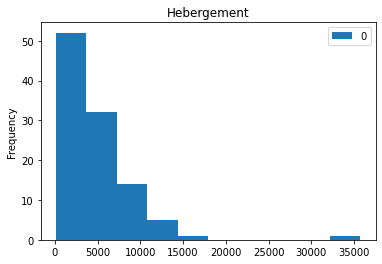

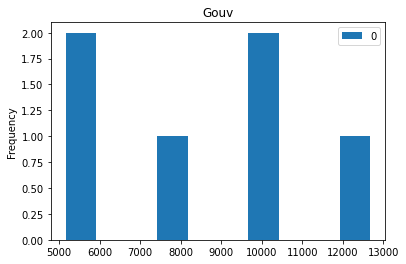

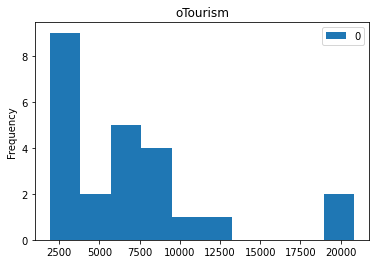

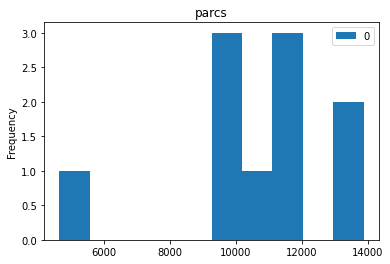

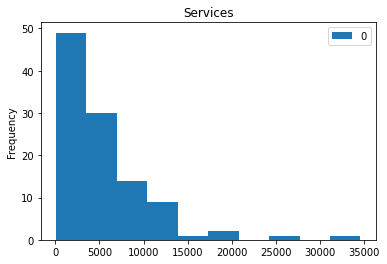

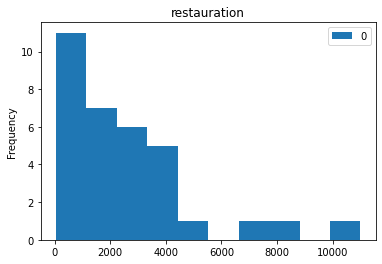

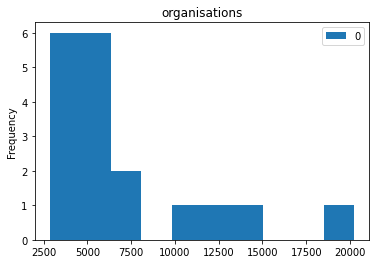

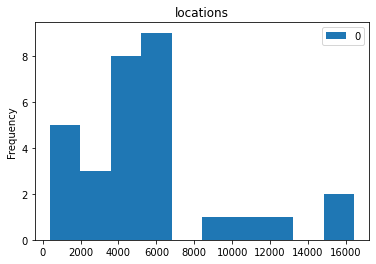

In [ ]:
stats = dict()
for ndf in os.listdir(stockageEntree + "/ContenusSites/"):
  if not ndf.startswith('.')  and "backlinks" not in ndf and 'stats' not in ndf and 'Partners'  not in ndf and "BadUrls" not in ndf:
    fichierEntree = stockageEntree + '/ContenusSites/' + ndf
    with open (fichierEntree, 'r', encoding='utf8') as  fictemp: #pour ouvrir les contenus 
      soup=json.load(fictemp)
    ndf = ndf.replace('.json', '')
    index = list([url for url in soup.keys() if url not in aVirer[ndf] and url in aGarder[ndf]])

    data  = [len(soup[url]) for url in index ]
    donnees = pd.DataFrame.from_dict(data)
    donnees.index = index
    donnees.plot.hist(bins=10, title = ndf)
    stats [ndf]  = donnees.describe()


 # stats contient la description statistique des données fondée sur la taille
 # de celle-ci. Cette variable servira a exclure les url dont la variation
 # à la moyenne est trop importante : trop ou pas assez sont considérés comme
 # des singularités. Cela peut provenir de la forme choisie pour la page (grande
 # page qui contient "tout" avec un ascenceur interminable ou par ex. une page composée
 # par des appels url en js que le collecteur ne reconstruit pas) 

In [ ]:
stats [ndf][0]['mean']

5890.857142857143

In [ ]:
# suppression des extrêmes
seuil = 0.95 # plus de deux fois autour de la moyenne pour le max
seuilBas = 500 # plancher ARBITRAIRE de 500 caractères au dessus
# le code qui suit sert à exclure les extrêmes (taille de collecte) hors zone 
# entre la valeur moyenne sur la collecte +/- sa valeur valeur multipliée par le seuil
# il ne faut pas réitérer la boucle plusieurs fois au risque de voir exclure tout le monde
# Si le seuil est modifié il faut ré-exécuter la cellule d'initialisation des statistiques
for ndf in os.listdir(stockageEntree + "/ContenusSites/"):
  if not ndf.startswith('.') and "backlinks" not in ndf and "stats" not in ndf and 'Partners' not in ndf and "BadUrls" not in ndf:
    fichierEntree = stockageEntree +  '/ContenusSites/' +ndf
    with open (fichierEntree, 'rb') as  fictemp: #pour ouvrir les contenus 
      soup=json.load(fictemp)
    ndf = ndf.replace('.json', '')
    if ndf not in aGarder.keys():
      aGarder[ndf] = []
    if ndf not in aVirer.keys():
      aVirer[ndf] = []
    for url in soup.keys():
      # autour de la moyenne +/- sa valeur divisée par le seuil
      if (len(soup[url]) >  seuilBas) and (len(soup[url]) < stats[ndf][0]['mean'] + stats[ndf][0]['mean']//seuil):
          # print( len(soup [url]), stats [ndf] [0]['mean']/seuil)
          if url not in aGarder[ndf]:
            aGarder[ndf].append(url)
            if url in aVirer [ndf]:
              aVirer[ndf].remove(url)
          else:
            pass
      else:
        aVirer[ndf].append(url)
        if url in aGarder[ndf]:
          aGarder[ndf]. remove (url)
    print (ndf, "  ", stats[ndf][0]['count'], " exclus ", len(set(aVirer[ndf])))
    index = list([url for url in soup.keys() if url not in aVirer[ndf] and url in aGarder[ndf]])

    data  = [len(soup[url]) for url in aGarder[ndf] if url not in aVirer[ndf]]
    # mise à jour des stats
    donnees = pd.DataFrame.from_dict(data)
    donnees.index = index
    stats [ndf.replace('.json', '')] = donnees.describe()


mairies    7.0  exclus  1
Hebergement    105.0  exclus  26
Gouv    6.0  exclus  0
oTourism    24.0  exclus  2
parcs    10.0  exclus  16
Services    107.0  exclus  17
restauration    33.0  exclus  9
organisations    18.0  exclus  3
locations    30.0  exclus  6


In [ ]:
stats



---

Sauvegarde des stats initiales



---



In [ ]:
fichierDeSortie = stockageEntree + '/ContenusTraites/stats.json' 

In [ ]:
donnees .to_json(fichierDeSortie)

# Traitement des fichiers produits par le scrapper
> ndf est le fichier produit par le scapper. On le charge le spacytraite pour visualiser

In [ ]:
dicoEtiquettage = dict() # etiquettes par typologie de site
aEviter = dict()
verbes = dict() #listes à remplir avec verbes/adj/noms/entités trouvés 
adjectifs  = dict() 
noms = dict()
Etiquette  = dict() # etiquettes par typologie de site Et par site
adverbes = dict()
tempAdv = dict()

In [ ]:
catGramm = dict()

In [ ]:
  tal = spacy.load('fr_core_news_sm')
    # 'fr_dep_news_trf' fonctionne mieux pour l'étiquetagge
  tal1 = spacy.load('fr_dep_news_trf', disable = ['tagger', "ner"])

In [ ]:
cats = ["VERB", "ADJ", "ADV", "NOUN"]
Done = list(catGramm .keys())

for ndf in os.listdir(stockageEntree + "/ContenusSites/"):
  fichierEntree = stockageEntree + '/ContenusSites/' + ndf
  if (not ndf.startswith('.')) and (ndf not in Done) and ("backlinks" not in ndf) and ("stats" not in ndf) and ('Partners' not in ndf) and "BadUrls" not in ndf and 'pkl' not in ndf:
    # chargement des données collectées par le scrapeur
    with open (fichierEntree, 'r', encoding='utf8') as  fictemp: #pour ouvrir les contenus 
      soupe=json.load(fictemp)
    ndf = ndf.replace('.json', '')
    dicoEtiquettage[ndf], Etiquette [ndf] = dict(), dict()
    # nettoyage
    tousLesContenus = """""" # une longue chaine qui contiendra tous les contenus des sites de la ndf

    for url in aGarder[ndf]:
      tousLesContenus = soupe[url] 
      doc = tal(tousLesContenus)
      Etiquette [ndf][url] = dict()
        # Si l'environnement n'a pas été redémarré, le code plante ici
        #extraction des entités
      entites = []
      for entity in doc.ents:
        if entity.label_ not in Etiquette [ndf][url].keys():
          Etiquette [ndf][url][entity.label_] = [entity.text]
        else:
          Etiquette [ndf][url][entity.label_].append(entity.text)
        
      if ndf not in aEviter.keys():
        aEviter[ndf] = dict()
        aEviter[ndf][url] =[]
      if url not in aEviter[ndf] .keys():
        aEviter[ndf][url] =[]
      for catego in ['LOC', 'MISC', 'PER', 'ORG']:
        if catego in Etiquette [ndf][url].keys():
          aEviter[ndf][url] += Etiquette [ndf][url][catego] # toutes les formes lexicale que l'on esquivera
          
      # utilisation de l'autre modèle
      doc = tal1(tousLesContenus)

      machin = [(truc.lemma_, truc.pos_) for truc in doc if truc.text not in aEviter[ndf][url] and truc.text.lower() not in aEviter[ndf][url] and truc.pos_ in cats]
      for truc in machin:
        if truc[1] in Etiquette [ndf][url] .keys():
          Etiquette [ndf][url][truc[1]] .append(truc [0])
        else:
          Etiquette [ndf][url][truc[1]] = [truc [0]]
      
    # Assemblage de toutes les mots etiquettés dans dicoEtiquettage
    for url in Etiquette [ndf].keys():
      for catG in Etiquette [ndf][url].keys():
        if catG in dicoEtiquettage[ndf] .keys():
          dicoEtiquettage[ndf][catG] .extend (Etiquette [ndf][url][catG])
        else:
          dicoEtiquettage[ndf][catG] = Etiquette [ndf][url][catG]
    # Extraction des lemmes par catégorie grammaticale
    catGramm [ndf] = dict()

    for cle in dicoEtiquettage[ndf] .keys(): 
      catGramm [ndf][cle] = Counter(dicoEtiquettage[ndf][cle])
    
    Done.append(ndf)

Token indices sequence length is longer than the specified maximum sequence length for this model (838 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
for ndf in Etiquette.keys():
  if ndf not in verbes.keys():
    verbes[ndf] = []      
  if ndf not in adjectifs.keys():
    adjectifs[ndf] = []
  if ndf not in noms.keys():
    noms[ndf] = []       
  if ndf not in adverbes.keys(): #ADVERBES
    adverbes[ndf] = []
  for url in Etiquette [ndf] .keys():
    if "VERB" in Etiquette [ndf][url] .keys(): 
      verbes[ndf] +=Etiquette [ndf][url]["VERB"]
    if "NOUN" in Etiquette [ndf][url] .keys():
      noms[ndf] += Etiquette [ndf][url]["NOUN"]
    if "ADV" in Etiquette [ndf][url] .keys():
      adverbes[ndf] += Etiquette [ndf][url]["ADV"]
    if "ADJ" in Etiquette [ndf][url] .keys():
      adjectifs[ndf] += Etiquette [ndf][url]["ADJ"]

In [ ]:
catGramm .keys()

dict_keys(['Gouv', 'parcs', 'organisations', 'oTourism', 'Services', 'Hebergement', 'restauration', 'locations', 'mairies'])

In [ ]:
fichierDeSortie = stockageSortie + '/ContenusTraites/' +"verbesSites.json"
with open (fichierDeSortie, 'w', encoding='utf8') as  fictemp: #on met tous les contenus dans un json
  json.dump(verbes, fictemp)

fichierDeSortie = stockageSortie + '/ContenusTraites/' +'nomsSites.json'
with open (fichierDeSortie, 'w', encoding='utf8') as  fictemp: #on met tous les contenus dans un json
  json.dump(noms, fictemp)

fichierDeSortie = stockageSortie + '/ContenusTraites/' +'adjectifsSites.json'
with open (fichierDeSortie, 'w', encoding='utf8') as  fictemp: #on met tous les contenus dans un json
  json.dump(adjectifs, fictemp)

fichierDeSortie = stockageSortie + '/ContenusTraites/' +'adverbesSites.json'
with open (fichierDeSortie, 'w', encoding='utf8') as  fictemp: #on met tous les contenus dans un json
  json.dump(adverbes, fictemp)

In [ ]:
fichierDeSortie = stockageSortie + '/ContenusTraites/' +'Etiquettes.json'
with open (fichierDeSortie, 'w', encoding='utf8') as  fictemp: #on met tous les contenus dans un json
  json.dump(Etiquette, fictemp)

In [ ]:
fichierDeSortie = stockageSortie + '/ContenusTraites/' +'spacySites.json'
with open (fichierDeSortie, 'w', encoding='utf8') as  fictemp: #on met tous les contenus dans un json (redondant avec le précédent)
  json.dump(dicoEtiquettage, fictemp)

In [ ]:
fichierDeSortie = stockageSortie + '/ContenusTraites/' +'catGrammSites.json'
with open (fichierDeSortie, 'w', encoding='utf8') as  fictemp: #on met tous les contenus dans un json
  json.dump(catGramm, fictemp)

# Tests des représentations
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from urllib import parse


def makeImage(text):
    wc = WordCloud(background_color="white", max_words=100,width=800, height=400)
    wc.generate_from_frequencies(text)

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

temp = ["veuillez preservation pizzas mimosas découvrez venez jouez visitez écoutez lisez" ]
makeImage(catGramm['parcs'] ['ADJ'])
fichierDeSortie = stockageSortie + '/ContenusTraites/' +'Partners.pkl'
with open (fichierDeSortie, 'rb') as  fictemp: #on met tous les contenus dans pickle
  dicoEtiquettagePartners = pickle.load(fictemp)
import json
fichierDeSortie = stockageSortie + 'OUT/JSON/' +'ListePartners.json'
with open(fichierDeSortie, 'w', encoding='utf-8') as f:
    json.dump(list(dicoEtiquettagePartners .keys()),f )
[cle for cle in  dicoEtiquettagePartners.keys() if "portcros" in cle]
stats
import json
fichierDeSortie = stockageSortie + 'OUT/JSON/' +'ContenusPartners.json'
with open(fichierDeSortie, 'w', encoding='utf-8') as f:
    json.dump(dicoEtiquettagePartners,f )